In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
 
def price_barrier_option(option_type, ticker, K, barrier_price, r=0.05, num_simulations=10000):
    data = yf.download(ticker, start='2022-01-01', end='2025-10-15', auto_adjust=True)  
    close = data['Close'].squeeze()
    daily_returns = close.pct_change().dropna()
 
    # Parámetros
    S0 = float(close.iloc[-1])
    sigma = daily_returns.std() * np.sqrt(252)
    T_days = 252
    T = 1
    dt = T / T_days
 
    #  Simulación de trayectorias
    Z = np.random.normal(0, 1, (num_simulations, T_days))
    increments = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    log_paths = np.cumsum(increments, axis=1)
    S = S0 * np.exp(log_paths)
    S = np.concatenate([np.full((num_simulations, 1), S0), S], axis=1)
 
    #  Barrera (up-and-out)
    barrier_breached = (S > barrier_price).any(axis=1)
    ST = S[:, -1]
 
    #  Payoff
    if option_type == 'call':
        payoffs = np.where(~barrier_breached, np.maximum(ST - K, 0), 0)
    else:
        payoffs = np.where(~barrier_breached, np.maximum(K - ST, 0), 0)
 
    #  Precio descontado
    price = np.exp(-r * T) * np.mean(payoffs)
 
    return float(S0), float(price)
 
 
#  Ejemplo de uso

S0, price = price_barrier_option('put', 'SPY', K=680, barrier_price=700)
print(f"Precio actual del subyacente (S0): {S0:.2f}")
print(f"Precio estimado de la opción barrera: {price:.4f}")

[*********************100%***********************]  1 of 1 completed


Precio actual del subyacente (S0): 662.23
Precio estimado de la opción barrera: 24.2334


## Ejercicio 1 
## Sensibilidad al nivel de barrera

Fija los parámetros:

option_type = 'call'

ticker = 'SPY'

- K = 680

- r = 0.05

Simula el precio de la opción para cinco niveles de barrera:
700, 710, 720, 730 y 740.

Muestra los resultados en una tabla y grafica:

- Eje X: nivel de barrera.

- Eje Y: precio estimado de la opción.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Barrera: 700, Precio: 0.0348



[*********************100%***********************]  1 of 1 completed

Barrera: 710, Precio: 0.1281



[*********************100%***********************]  1 of 1 completed

Barrera: 720, Precio: 0.3421



[*********************100%***********************]  1 of 1 completed

Barrera: 730, Precio: 0.5872


Barrera: 740, Precio: 1.0185


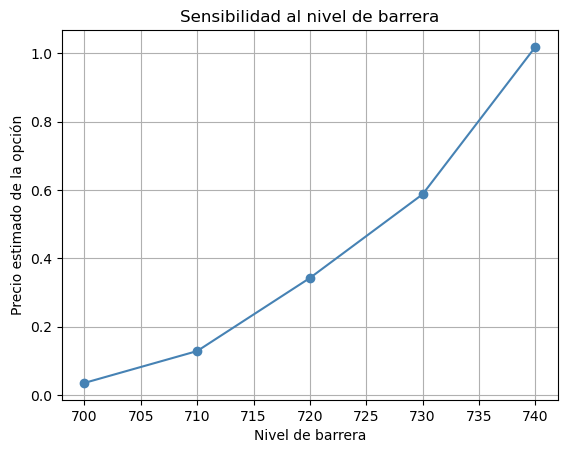

In [3]:
# EJERCICIO 1: 
barriers = [700, 710, 720, 730, 740]
prices = []

for b in barriers:
    S0, p = price_barrier_option('call', 'SPY', K=680, barrier_price=b)
    prices.append(p)
    print(f"Barrera: {b}, Precio: {p:.4f}")

plt.plot(barriers, prices, marker='o', color='steelblue')
plt.title('Sensibilidad al nivel de barrera')
plt.xlabel('Nivel de barrera')
plt.ylabel('Precio estimado de la opción')
plt.grid(True)
plt.show()

#### Pregunta guía: ¿Qué relación observas entre la altura de la barrera y el valor de la opción?

Que entre mayor es el precio de la opción mayor es el nivel de la barrera, o viceversa. Esto ocurre porque si el límite en el que podemos ejecutar la opción de la opción barrera es muy alto, esto haría que el pago por esta opción se incremente puesto que tenemos más probabilidades de tener escearios positivos. Pagamos más por la posibilidad de poder ganar más. 

## Ejercicio 2 – Sensibilidad a la volatilidad
Modifica la función para incluir un argumento sigma_override que permita reemplazar la volatilidad histórica.
Si sigma_override no es None, úsalo en lugar de daily_returns.std() * np.sqrt(252).

Evalúa el precio de la opción para cuatro niveles de volatilidad:
0.1, 0.2, 0.3 y 0.4.

Grafica cómo cambia el precio con la volatilidad. 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Volatilidad: 0.10, Precio: 1.2774



[*********************100%***********************]  1 of 1 completed

Volatilidad: 0.20, Precio: 0.2349



[*********************100%***********************]  1 of 1 completed

Volatilidad: 0.30, Precio: 0.1016


Volatilidad: 0.40, Precio: 0.0373


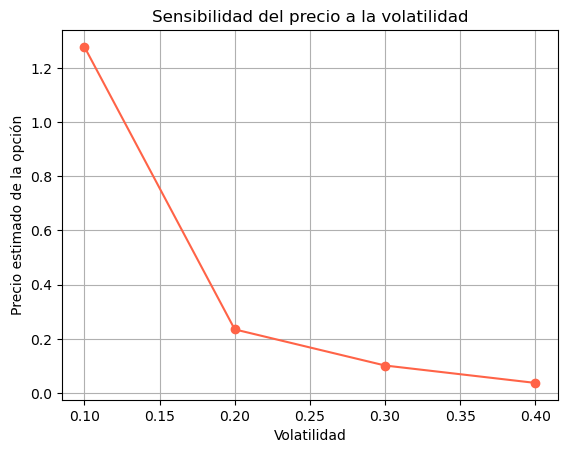

In [8]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

def price_barrier_option(option_type, ticker, K, barrier_price, r=0.05, num_simulations=10000, sigma_override=None):
    # Descargar datos históricos
    data = yf.download(ticker, start='2022-01-01', end='2025-10-15', auto_adjust=True)
    close = data['Close'].squeeze()
    daily_returns = close.pct_change().dropna()

    # Parámetros
    S0 = float(close.iloc[-1])

    # Usar volatilidad histórica o la indicada manualmente
    if sigma_override is not None:
        sigma = sigma_override
    else:
        sigma = daily_returns.std() * np.sqrt(252)

    T_days = 252
    T = 1  # 1 año
    dt = T / T_days

    # Simulación de trayectorias
    Z = np.random.normal(0, 1, (num_simulations, T_days))
    increments = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    log_paths = np.cumsum(increments, axis=1)
    S = S0 * np.exp(log_paths)
    S = np.concatenate([np.full((num_simulations, 1), S0), S], axis=1)

    # Barrera (up-and-out)
    barrier_breached = (S > barrier_price).any(axis=1)
    ST = S[:, -1]

    # Payoff
    if option_type == 'call':
        payoffs = np.where(~barrier_breached, np.maximum(ST - K, 0), 0)
    else:
        payoffs = np.where(~barrier_breached, np.maximum(K - ST, 0), 0)

    # Precio descontado
    price = np.exp(-r * T) * np.mean(payoffs)

    return float(S0), float(price)


# ============================
# EJERCICIO 2
# ============================

vols = [0.1, 0.2, 0.3, 0.4]
prices_vol = []

for sigma in vols:
    S0, price = price_barrier_option('call', 'SPY', K=680, barrier_price=720, sigma_override=sigma)
    prices_vol.append(price)
    print(f"Volatilidad: {sigma:.2f}, Precio: {price:.4f}")

# Gráfica de sensibilidad
plt.plot(vols, prices_vol, marker='o', color='tomato')
plt.title('Sensibilidad del precio a la volatilidad')
plt.xlabel('Volatilidad')
plt.ylabel('Precio estimado de la opción')
plt.grid(True)
plt.show()


## Ejercicio 3 – Comparación con una opción sin barrera
Modifica el código para calcular el precio de una opción europea estándar (sin barrera).
Compara ambos precios (con y sin barrera) para los mismos parámetros.

In [9]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

def price_barrier_option(option_type, ticker, K, barrier_price, r=0.05, num_simulations=10000, sigma_override=None):
    data = yf.download(ticker, start='2022-01-01', end='2025-10-15', auto_adjust=True)
    close = data['Close'].squeeze()
    daily_returns = close.pct_change().dropna()

    S0 = float(close.iloc[-1])

    if sigma_override is not None:
        sigma = sigma_override
    else:
        sigma = daily_returns.std() * np.sqrt(252)

    T_days = 252
    T = 1
    dt = T / T_days

    np.random.seed(42)
    Z = np.random.normal(0, 1, (num_simulations, T_days))
    increments = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    log_paths = np.cumsum(increments, axis=1)
    S = S0 * np.exp(log_paths)
    S = np.concatenate([np.full((num_simulations, 1), S0), S], axis=1)

    barrier_breached = (S > barrier_price).any(axis=1)
    ST = S[:, -1]

    if option_type == 'call':
        payoffs = np.where(~barrier_breached, np.maximum(ST - K, 0), 0)
    else:
        payoffs = np.where(~barrier_breached, np.maximum(K - ST, 0), 0)

    price = np.exp(-r * T) * np.mean(payoffs)
    return float(S0), float(price)


def price_european_option(option_type, ticker, K, r=0.05, num_simulations=10000, sigma_override=None):
    data = yf.download(ticker, start='2022-01-01', end='2025-10-15', auto_adjust=True)
    close = data['Close'].squeeze()
    daily_returns = close.pct_change().dropna()

    S0 = float(close.iloc[-1])

    if sigma_override is not None:
        sigma = sigma_override
    else:
        sigma = daily_returns.std() * np.sqrt(252)

    T_days = 252
    T = 1
    dt = T / T_days

    np.random.seed(42)
    Z = np.random.normal(0, 1, (num_simulations, T_days))
    increments = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    log_paths = np.cumsum(increments, axis=1)
    S = S0 * np.exp(log_paths)
    ST = S[:, -1]

    if option_type == 'call':
        payoffs = np.maximum(ST - K, 0)
    else:
        payoffs = np.maximum(K - ST, 0)

    price = np.exp(-r * T) * np.mean(payoffs)
    return float(S0), float(price)


# ============================
# COMPARACIÓN (EJERCICIO 3)
# ============================

K = 680
barrier_price = 720
sigma = 0.2

S0, price_barrier = price_barrier_option('call', 'SPY', K, barrier_price, sigma_override=sigma)
_, price_european = price_european_option('call', 'SPY', K, sigma_override=sigma)

print(f"Precio actual del subyacente (S0): {S0:.2f}")
print(f"Precio opción europea (sin barrera): {price_european:.4f}")
print(f"Precio opción barrera (up-and-out): {price_barrier:.4f}")
print(f"Diferencia: {price_european - price_barrier:.4f}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Precio actual del subyacente (S0): 662.23
Precio opción europea (sin barrera): 58.6604
Precio opción barrera (up-and-out): 0.2412
Diferencia: 58.4192


**Pregunta: ¿Por qué el precio de la opción barrera siempre debe ser menor o igual que el de una opción europea equivalente**

Porque una opción con barrera tiene un límite en donde la opción ya no tendría valor. Si una opción barrera se ejecuta sin llegar a este límite tendría el mismo precio que una europea, pero si sobrepasa este límite, su payoff sería de 0 mientras que la opción europea aún tendría escenarios posiblesde ganancia.
 